## 🧤 Goalkeeper Analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data
df = pd.read_csv("players_data-2024_2025.csv")
df.fillna(0, inplace=True)

## Distribution of Save %

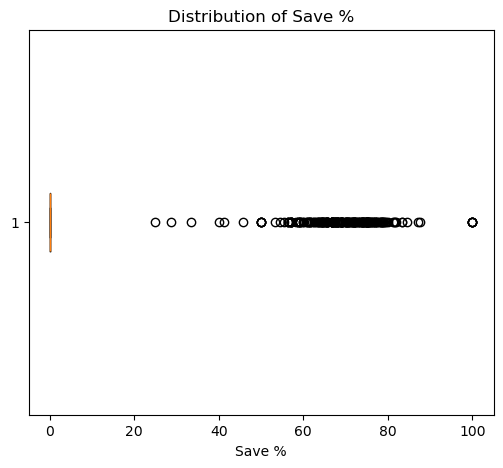

In [4]:
Comp = df['Comp'].value_counts().head(5).index
df_top5_comp = df[df['Comp'].isin(Comp)]


plt.figure(figsize=(6,5))
plt.boxplot(df_top5_comp['Save%'].dropna(), vert=False)
plt.xlabel("Save %")
plt.title("Distribution of Save %")
plt.show()

## Top 10 Goalkeepers by Saves

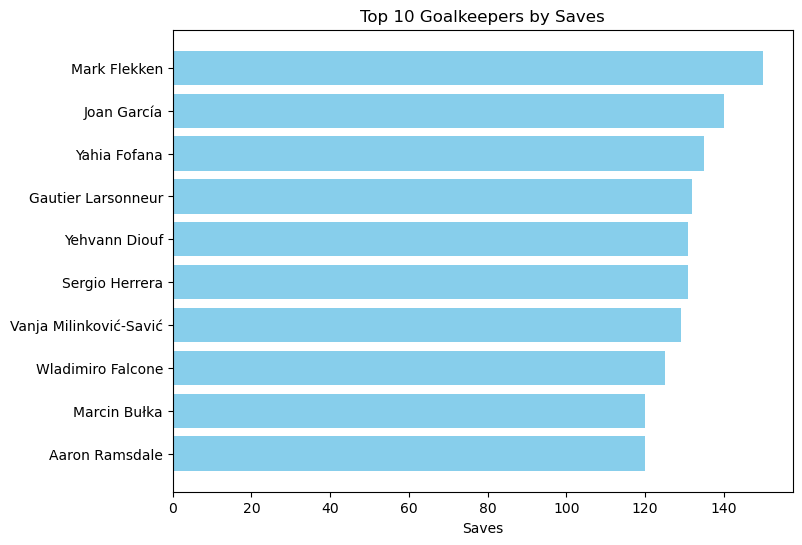

In [5]:
top_saves = df_top5_comp[['Player','Saves']].sort_values(by='Saves', ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.barh(top_saves['Player'][::-1], top_saves['Saves'][::-1], color='skyblue')
plt.xlabel("Saves")
plt.title("Top 10 Goalkeepers by Saves")
plt.show()


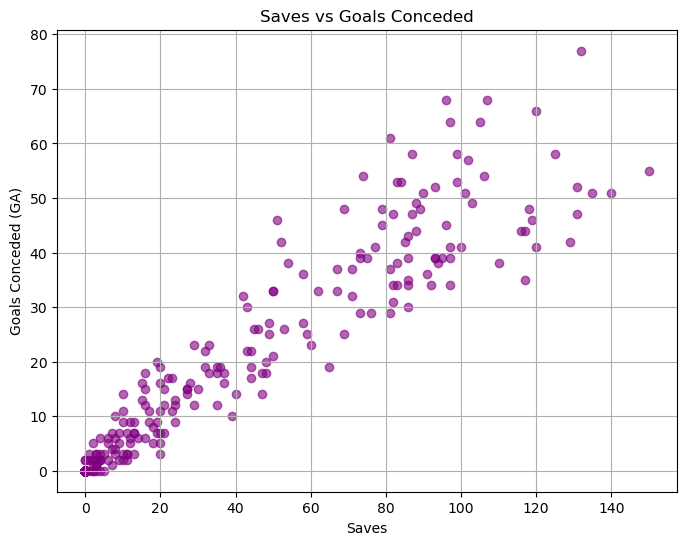

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df_top5_comp['Saves'], df_top5_comp['GA'], alpha=0.6, color='purple')
plt.xlabel("Saves")
plt.ylabel("Goals Conceded (GA)")
plt.title("Saves vs Goals Conceded")
plt.grid(True)
plt.show()


## Least goals conceded (GA) && Clean sheets

/tmp/ipykernel_287303/392158362.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


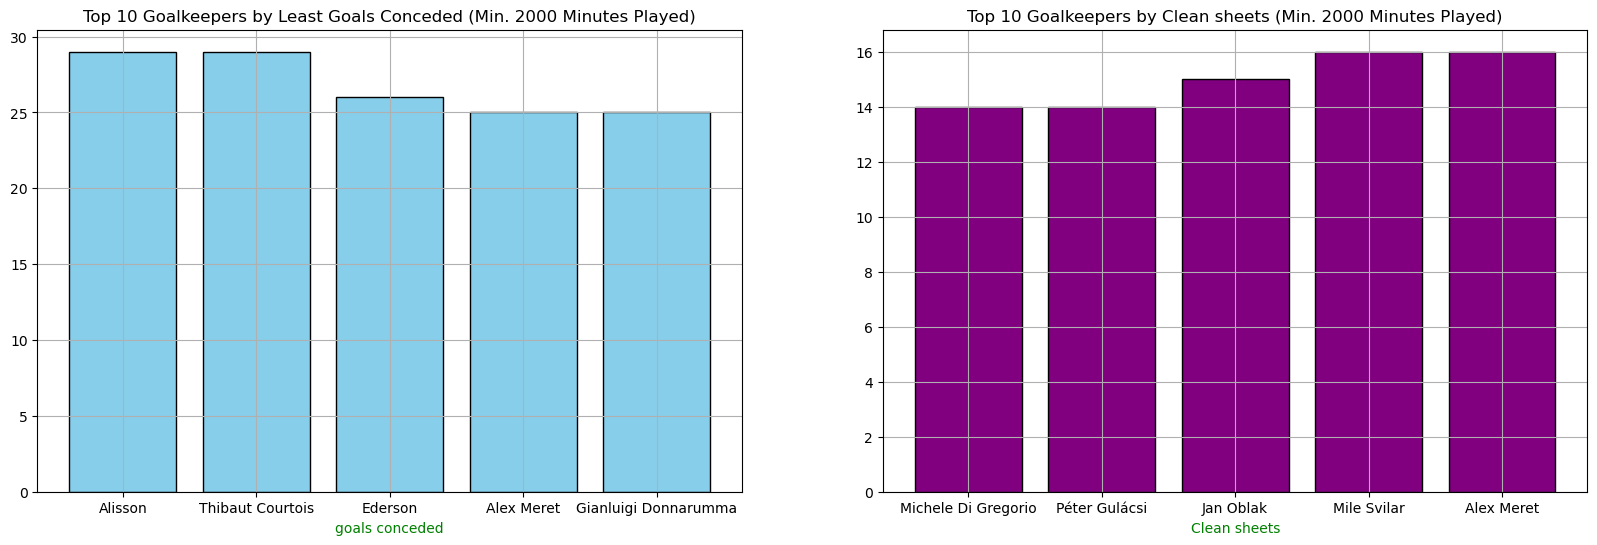

In [30]:
gk_df = df_top5_comp[df_top5_comp['Pos'] == 'GK']
gk_df = gk_df[gk_df['Min'] > 2000]
top_Gconceded = gk_df[['Player','GA', 'Comp', 'MP']].sort_values(by='GA', ascending=True).head(5).reset_index()
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].bar(top_Gconceded['Player'][::-1], top_Gconceded['GA'][::-1], color='#87CEEB', edgecolor="black")
ax[0].set_xlabel("goals conceded", color='green')
ax[0].set_title("Top 10 Goalkeepers by Least Goals Conceded (Min. 2000 Minutes Played)")
ax[0].grid()

top_CS = gk_df[['Player','CS', 'Comp', 'MP']].sort_values(by='CS', ascending=False).head(5).reset_index()
ax[1].bar(top_CS['Player'][::-1], top_CS['CS'][::-1], color='purple', edgecolor="black")
ax[1].set_xlabel("Clean sheets", color='green')
ax[1].set_title("Top 10 Goalkeepers by Clean sheets (Min. 2000 Minutes Played)")
ax[1].grid()
fig.show()


## Penalty specialists (PKsv)

<BarContainer object of 5 artists>

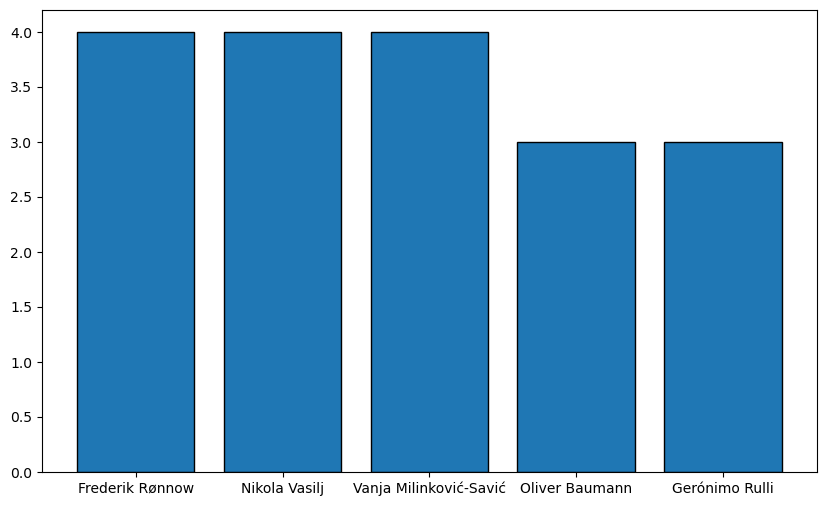

In [47]:
gk_df = df_top5_comp[df_top5_comp['Pos'] == 'GK']
gk_PKsv = gk_df[['Player','PKsv']].sort_values(by='PKsv', ascending=False).head(5).reset_index()

plt.figure(figsize=(10,6))

plt.bar(gk_PKsv['Player'], gk_PKsv['PKsv'], edgecolor='black')